### 1. Check Columns 
base_month : 기준년월<br>

leis_sports_cnt : 레저스포츠<br>

ref_view_cnt : 휴양 및 관람<br>

meet_work_cnt : 회의 및 업무<br>

visit_rel_cnt : 친지방문<br>

edu_trip_cnt : 교육여행<br>

etc_cnt : 기타방문<br>

total_visit_cnt : 총 입도객수

In [40]:
import pandas as pd
import datetime
import seaborn as sns

In [41]:
# dataset
df = pd.read_csv('./data.csv')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   base_month       91 non-null     int64
 1   leis_sports_cnt  91 non-null     int64
 2   ref_view_cnt     91 non-null     int64
 3   meet_work_cnt    91 non-null     int64
 4   visit_rel_cnt    91 non-null     int64
 5   edu_trip_cnt     91 non-null     int64
 6   etc_cnt          91 non-null     int64
 7   total_visit_cnt  91 non-null     int64
dtypes: int64(8)
memory usage: 5.8 KB


In [43]:
# Change base_month type to date
df['base_month'] = df['base_month'].astype('str')
df['base_month'] = df['base_month'].apply(lambda x: datetime.datetime.strptime(x, "%Y%m"))

In [44]:
df.head()

,base_month,leis_sports_cnt,ref_view_cnt,meet_work_cnt,visit_rel_cnt,edu_trip_cnt,etc_cnt,total_visit_cnt
0,2015-01-01,127063,521304,75791,55457,3621,9432,792668
1,2015-02-01,134718,459032,72552,43058,202,12025,721587
2,2015-03-01,143528,490004,78294,44581,20466,14841,791714
3,2015-04-01,146259,623087,83467,27927,44893,13662,939295
4,2015-05-01,179944,628479,87166,29779,71746,18225,1015339


In [45]:
df.describe()

,leis_sports_cnt,ref_view_cnt,meet_work_cnt,visit_rel_cnt,edu_trip_cnt,etc_cnt,total_visit_cnt
count,91.000000,9.100000e+01,91.000000,91.000000,91.000000,91.000000,9.100000e+01
mean,114388.593407,7.475025e+05,78727.417582,59168.835165,14504.703297,13402.505495,1.027695e+06
std,47783.330174,1.607794e+05,36119.852819,31272.366561,22197.846311,10122.836840,1.802875e+05
min,27181.000000,2.967420e+05,21955.000000,11593.000000,0.000000,0.000000,4.656720e+05
25%,73527.500000,6.506765e+05,54037.000000,32358.500000,81.000000,6813.000000,9.443415e+05
50%,117021.000000,7.582060e+05,71107.000000,55459.000000,3123.000000,10952.000000,1.066510e+06
75%,147625.000000,8.690640e+05,94278.500000,78080.000000,18179.500000,17081.000000,1.156234e+06
max,223950.000000,1.040438e+06,203258.000000,173601.000000,83508.000000,65940.000000,1.301963e+06


In [46]:
# Check NAN data
for col in df.columns:
    msg = 'columns: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df[col].isnull().sum() / df[col].shape[0]))
    print(msg)

columns: base_month	 Percent of NaN value: 0.00%
columns: leis_sports_cnt	 Percent of NaN value: 0.00%
columns: ref_view_cnt	 Percent of NaN value: 0.00%
columns: meet_work_cnt	 Percent of NaN value: 0.00%
columns: visit_rel_cnt	 Percent of NaN value: 0.00%
columns: edu_trip_cnt	 Percent of NaN value: 0.00%
columns:    etc_cnt	 Percent of NaN value: 0.00%
columns: total_visit_cnt	 Percent of NaN value: 0.00%


/var/folders/md/9n6kyyln37d2ttfz5nklq8540000gn/T/ipykernel_44214/2831596243.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_visit_cnt'])


<AxesSubplot:xlabel='total_visit_cnt', ylabel='Density'>

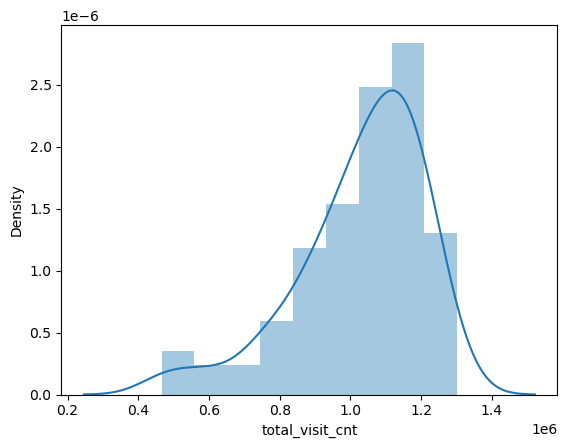

In [52]:
#histogram
sns.distplot(df['total_visit_cnt'])

#### histogram insight
- 정규분포에서 벗어난다.
- 첨도형이다.
- 정점을 가진다.

In [53]:
#skewness and kurtosis
print("Skewness: %f" % df['total_visit_cnt'].skew())
print("Kurtosis: %f" % df['total_visit_cnt'].kurt())

Skewness: -1.145994
Kurtosis: 1.214166
